In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('MAIN DATA.csv')

In [3]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df[['Team','Games','City','Medal']].sort_values(by='Medal')

,Team,Games,City,Medal
104480,Russia,2016 Summer,Rio de Janeiro,Bronze
236585,Australia,2012 Summer,London,Bronze
112610,Thailand,2004 Summer,Athina,Bronze
112604,Bulgaria,2016 Summer,Rio de Janeiro,Bronze
112580,Japan,1968 Summer,Mexico City,Bronze
...,...,...,...,...
271111,Poland-1,1976 Winter,Innsbruck,NaN
271112,Poland,2014 Winter,Sochi,NaN
271113,Poland,2014 Winter,Sochi,NaN
271114,Poland,1998 Winter,Nagano,NaN


In [5]:
df['Medal'] = df['Medal'].dropna()

In [6]:
mydata=df.dropna()[['Team','Games','City','Medal']].sort_values(by='Medal')

In [7]:
mydata

,Team,Games,City,Medal
40,Finland,2014 Winter,Sochi,Bronze
194378,Finland,1964 Summer,Tokyo,Bronze
88267,Finland,2010 Winter,Vancouver,Bronze
194331,Finland,1998 Winter,Nagano,Bronze
194242,Australia,2000 Summer,Sydney,Bronze
...,...,...,...,...
195190,France,2016 Summer,Rio de Janeiro,Silver
87464,Hungary,1948 Summer,London,Silver
87460,Hungary,1972 Summer,Munich,Silver
195072,Ma'Lindo,1960 Summer,Roma,Silver


In [8]:
mydata['Team'].value_counts().head(15) #every athlete that has received a medal of B, S, or G

United States    4273
Soviet Union     2203
Germany          1518
Australia        1196
Russia           1091
Canada           1024
Great Britain    1010
Italy            1008
France            965
East Germany      935
China             897
Japan             841
Hungary           789
Sweden            755
Finland           723
Name: Team, dtype: int64

In [9]:
#North America, European, Asia (2 each) (US, Canada, Soviet Union, Germany, China Japan)

In [10]:
mydata['Gold']=mydata['Medal'].apply(lambda x: 1 if x=='Gold' else 0)

In [11]:
mydata['Silver']=mydata['Medal'].apply(lambda x: 1 if x=='Silver' else 0)

In [12]:
mydata['Bronze']=mydata['Medal'].apply(lambda x: 1 if x=='Bronze' else 0)

In [13]:
mydata

,Team,Games,City,Medal,Gold,Silver,Bronze
40,Finland,2014 Winter,Sochi,Bronze,0,0,1
194378,Finland,1964 Summer,Tokyo,Bronze,0,0,1
88267,Finland,2010 Winter,Vancouver,Bronze,0,0,1
194331,Finland,1998 Winter,Nagano,Bronze,0,0,1
194242,Australia,2000 Summer,Sydney,Bronze,0,0,1
...,...,...,...,...,...,...,...
195190,France,2016 Summer,Rio de Janeiro,Silver,0,1,0
87464,Hungary,1948 Summer,London,Silver,0,1,0
87460,Hungary,1972 Summer,Munich,Silver,0,1,0
195072,Ma'Lindo,1960 Summer,Roma,Silver,0,1,0


In [14]:
new=mydata.groupby(by=['Team','City']).sum().reset_index()

In [15]:
new[new['Team']=='China']

,Team,City,Gold,Silver,Bronze
267,China,Albertville,0,2,0
268,China,Athina,42,27,13
269,China,Atlanta,13,66,15
270,China,Barcelona,14,40,13
271,China,Beijing,72,49,49
272,China,Lillehammer,0,1,2
273,China,London,50,38,29
274,China,Los Angeles,24,13,37
275,China,Nagano,0,9,5
276,China,Rio de Janeiro,44,30,35


In [17]:
df_city = new.set_index('City')

Text(0.5, 1.0, 'Chinese Olympic Medal Count by Host City')

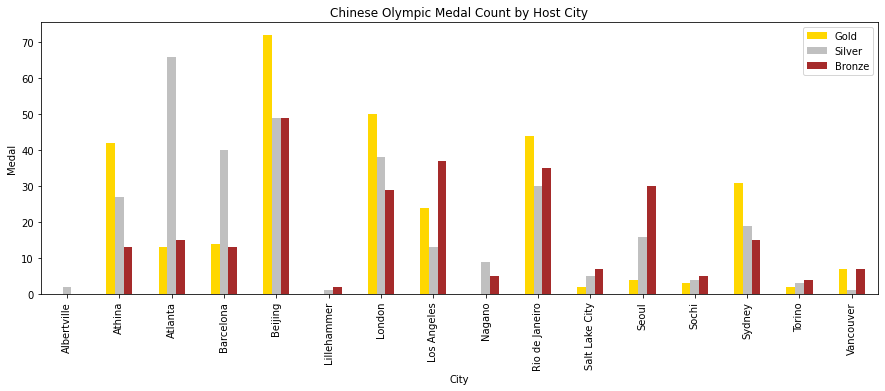

In [45]:
plot=df_city[df_city['Team']=='China'].plot(kind='bar', figsize=(15,5), color=['gold', 'silver', 'brown'])
plot.set_ylabel('Medal')
plot.set_title('Chinese Olympic Medal Count by Host City')

In [46]:
plot.figure.savefig('China3.pdf',bbox_inches='tight')

In [20]:
new[new['Team']=='United States']

,Team,City,Gold,Silver,Bronze
1533,United States,Albertville,5,7,2
1534,United States,Amsterdam,27,13,10
1535,United States,Antwerpen,28,27,6
1536,United States,Athina,133,85,74
1537,United States,Atlanta,147,43,50
1538,United States,Barcelona,87,50,84
1539,United States,Beijing,121,110,77
1540,United States,Berlin,34,11,4
1541,United States,Calgary,2,1,2
1542,United States,Chamonix,0,4,0


Text(0.5, 1.0, 'United States Olympic Medal Count by Host City')

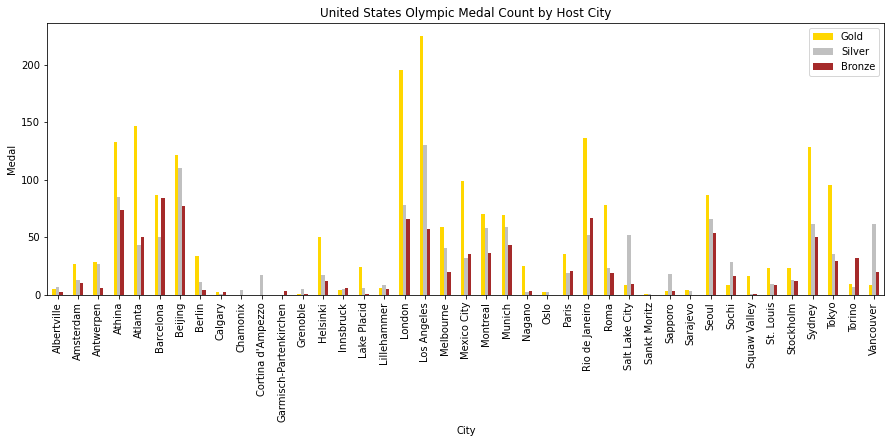

In [48]:
plot1=df_city[df_city['Team']=='United States'].plot(kind='bar', figsize=(15,5), color=['gold', 'silver', 'brown'])
plot1.set_ylabel('Medal')
plot1.set_title('United States Olympic Medal Count by Host City')

In [49]:
plot1.figure.savefig('USA3.pdf', bbox_inches='tight')

In [23]:
new[new['Team']=='Japan']

,Team,City,Gold,Silver,Bronze
840,Japan,Albertville,3,2,7
841,Japan,Amsterdam,1,1,0
842,Japan,Antwerpen,0,2,0
843,Japan,Athina,21,20,52
844,Japan,Atlanta,3,26,13
845,Japan,Barcelona,3,8,36
846,Japan,Beijing,23,15,13
847,Japan,Berlin,2,2,4
848,Japan,Calgary,0,0,1
849,Japan,Cortina d'Ampezzo,0,1,0


Text(0.5, 1.0, 'Japan Olympic Medal Count by Host City')

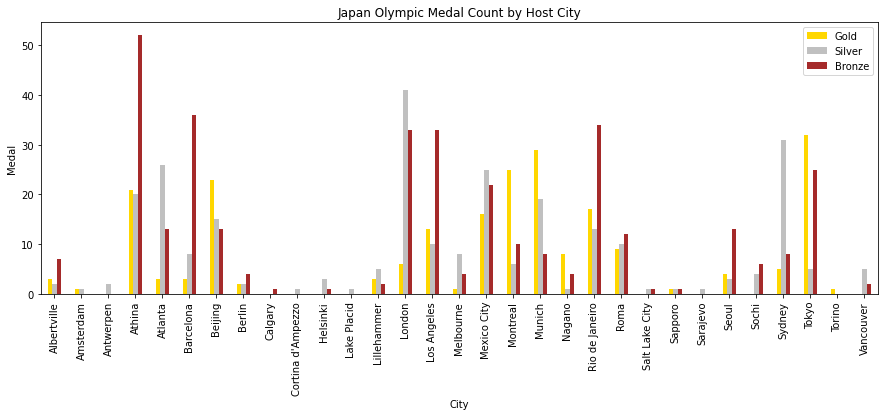

In [50]:
plot2=df_city[df_city['Team']=='Japan'].plot(kind='bar', figsize=(15,5), color=['gold', 'silver', 'brown'])
plot2.set_ylabel('Medal')
plot2.set_title('Japan Olympic Medal Count by Host City')

In [51]:
plot2.figure.savefig('Japan3.pdf',bbox_inches='tight')

In [26]:
new[new['Team']=='Canada']

,Team,City,Gold,Silver,Bronze
209,Canada,Albertville,5,28,1
210,Canada,Amsterdam,7,2,4
211,Canada,Antwerpen,9,1,1
212,Canada,Athina,4,10,4
213,Canada,Atlanta,8,30,10
214,Canada,Barcelona,27,5,12
215,Canada,Beijing,11,13,11
216,Canada,Berlin,1,2,3
217,Canada,Calgary,0,2,2
218,Canada,Chamonix,4,0,0


Text(0.5, 1.0, 'Canada Olympic Medal Count by Host City')

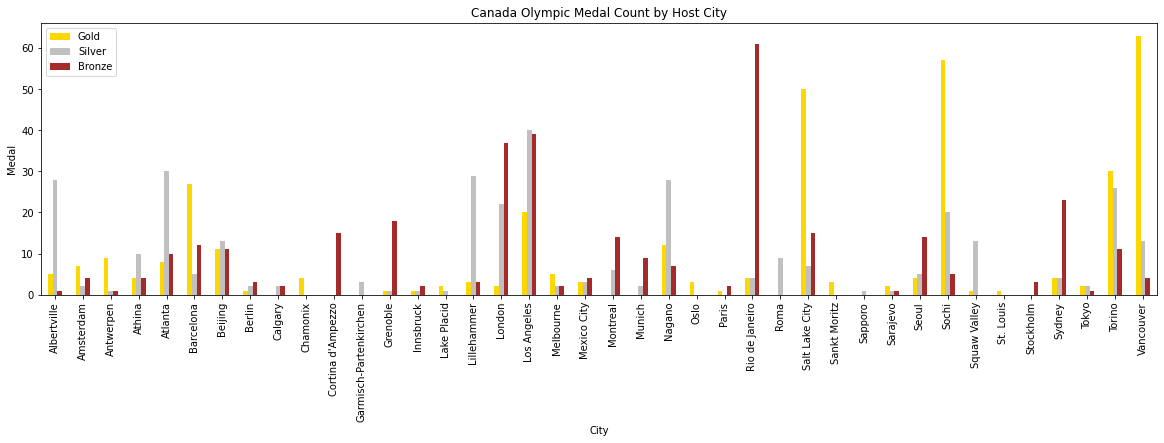

In [52]:
plot3=df_city[df_city['Team']=='Canada'].plot(kind='bar', figsize=(20,5),color=['gold', 'silver', 'brown'])
plot3.set_ylabel('Medal')
plot3.set_title('Canada Olympic Medal Count by Host City')

In [53]:
plot3.figure.savefig('Canada3.pdf',bbox_inches='tight')

In [29]:
new[new['Team']=='Germany']

,Team,City,Gold,Silver,Bronze
578,Germany,Albertville,12,9,5
579,Germany,Amsterdam,1,7,9
580,Germany,Athina,50,45,67
581,Germany,Atlanta,42,35,44
582,Germany,Barcelona,80,57,60
583,Germany,Beijing,39,16,41
584,Germany,Berlin,7,6,14
585,Germany,Helsinki,0,7,10
586,Germany,Innsbruck,3,2,3
587,Germany,Lake Placid,0,0,1


Text(0.5, 1.0, 'Germany Olympic Medal Count by Host City')

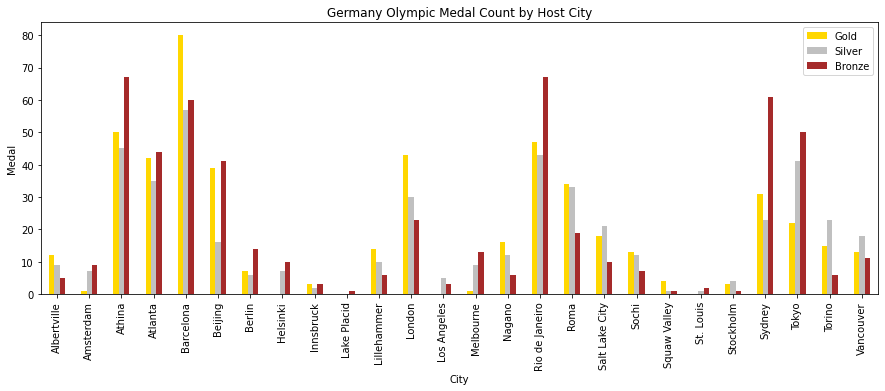

In [54]:
plot4=df_city[df_city['Team']=='Germany'].plot(kind='bar', figsize=(15,5), color=['gold', 'silver', 'brown'])
plot4.set_ylabel('Medal')
plot4.set_title('Germany Olympic Medal Count by Host City')

In [55]:
plot4.figure.savefig('Germany3.pdf', bbox_inches='tight')

In [32]:
new[new['Team']=='Soviet Union']

,Team,City,Gold,Silver,Bronze
1315,Soviet Union,Calgary,34,10,8
1316,Soviet Union,Cortina d'Ampezzo,17,3,3
1317,Soviet Union,Grenoble,22,4,5
1318,Soviet Union,Helsinki,5,12,8
1319,Soviet Union,Innsbruck,54,10,17
1320,Soviet Union,Lake Placid,11,26,4
1321,Soviet Union,Melbourne,28,21,31
1322,Soviet Union,Mexico City,65,63,64
1323,Soviet Union,Montreal,114,92,75
1324,Soviet Union,Moskva,184,128,125


Text(0.5, 1.0, 'Soviet Union Olympic Medal Count by Host City')

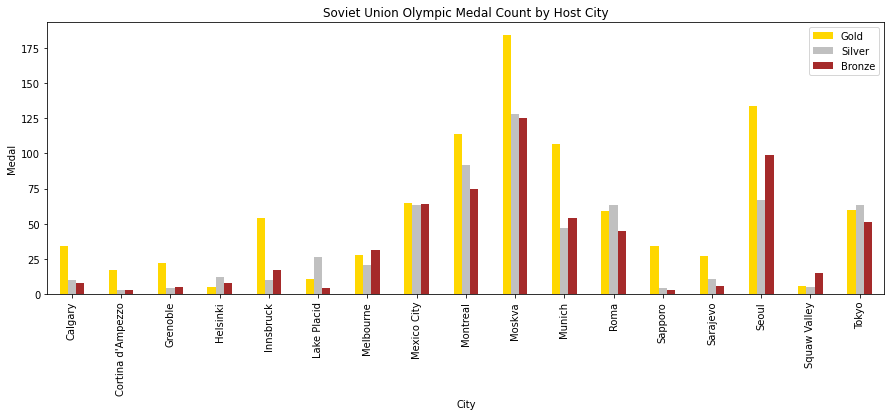

In [56]:
plot5=df_city[df_city['Team']=='Soviet Union'].plot(kind='bar', figsize=(15,5), color=['gold', 'silver', 'brown'])
plot5.set_ylabel('Medal')
plot5.set_title('Soviet Union Olympic Medal Count by Host City')

In [57]:
plot5.figure.savefig('SovietUnion3.pdf', bbox_inches='tight')

In [35]:
mylist=['United States', 'Germany','China', 'Japan', 'Soviet Union', 'Canada']
for country in mylist:
    print(country)
    print(mydata[mydata['Team']==country]['Medal'].value_counts())

United States
Gold      2075
Silver    1260
Bronze     938
Name: Medal, dtype: int64
Germany
Bronze    540
Gold      508
Silver    470
Name: Medal, dtype: int64
China
Silver    323
Gold      308
Bronze    266
Name: Medal, dtype: int64
Japan
Bronze    345
Silver    270
Gold      226
Name: Medal, dtype: int64
Soviet Union
Gold      961
Silver    629
Bronze    613
Name: Medal, dtype: int64
Canada
Gold      350
Bronze    338
Silver    336
Name: Medal, dtype: int64


In [36]:
mydata[mydata['Team']=='Germany']['Medal'].value_counts()

Bronze    540
Gold      508
Silver    470
Name: Medal, dtype: int64